#                                                Drink Habits of People Around the World 

### Alcohol consumption is very high nowadays around the world in geeneral. It seems almost everyone, almost everywhere prefers to drink different types of alcohol according to their respective tastes. Some consumers believe that alcohol can actually benefit human health but, continued heavy usage is also harmful. Drinking too much alcohol can initially cause fat accumulation in the liver. The liver can then become inflamed if one continues to drink resulting in hepatic failure and alcoholic hepatitis which can, in many instances, result in death. It can also increase the risk of liver cancer and cirrhosis in people who continue to drink. 

### In this exploratory data analysis notebook, we will look at the alcohol consumption habits of various countries. Let's make a comprehensive data analysis using the average alcohol consumption tables of countries in 2010.

# DATA SET

### Our dataset consists of beer, wine, vodka and pure alcohol drinking preferences for people in 191 countries. In addition, our data includes religions that are the majority in those countries.

### Columns
* country - 
* beer_servings-
* wine_servings-
* spirit_servings-
* total_litres_of_pure_alcohol-

## Why do people prefer certain drinks over others?
### There are many factors that affect people's drinking preferences. The country where he/she lives and the geographical location of the country is one of the reasons for this.

<img src= "https://i.insider.com/5370bd966da8116d754879e9?width=2500&format=jpeg&auto=webp">

Religious beliefs also restrict people from drinking. In some countries, the sale of alcohol is even prohibited. These countries are generally Islamic countries and alcohol consumption is relatively low in these countries due to the ban. People continue to drink somehow, but these may not be reflected in official numbers.

# LET'S EXPLORE

### LIBRARIES

### We must import the proper libraries for our research

In [3]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
# READ THE DATA 
df = pd.read_csv('drinks.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,Afghanistan,0,0,0,0.0,muslim mostly
1,Albania,89,132,54,4.9,muslim mostly
2,Algeria,25,0,14,0.7,christian mostly
3,Andorra,245,138,312,12.4,christian mostly
4,Angola,217,57,45,5.9,christian mostly


In [10]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [11]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
religion                         object
dtype: object

In [12]:
# Chechking null values 
def missing_values(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values.head()
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

In [13]:
# There are no missing values. Excellent. 
missing_values(df)

,columns,total missing,ration of missing
0,country,0,0.0
1,beer_servings,0,0.0
2,spirit_servings,0,0.0
3,wine_servings,0,0.0
4,total_litres_of_pure_alcohol,0,0.0
5,religion,0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Namibia'),
  Text(0, 1, 'Czech Republic'),
  Text(0, 2, 'Gabon'),
  Text(0, 3, 'Germany'),
  Text(0, 4, 'Lithuania'),
  Text(0, 5, 'Poland'),
  Text(0, 6, 'Venezuela'),
  Text(0, 7, 'Ireland'),
  Text(0, 8, 'Palau'),
  Text(0, 9, 'Romania'),
  Text(0, 10, 'Belgium'),
  Text(0, 11, 'Panama'),
  Text(0, 12, 'Spain'),
  Text(0, 13, 'Serbia'),
  Text(0, 14, 'Latvia'),
  Text(0, 15, 'Austria'),
  Text(0, 16, 'Slovenia'),
  Text(0, 17, 'Belize'),
  Text(0, 18, 'Finland'),
  Text(0, 19, 'Australia')])

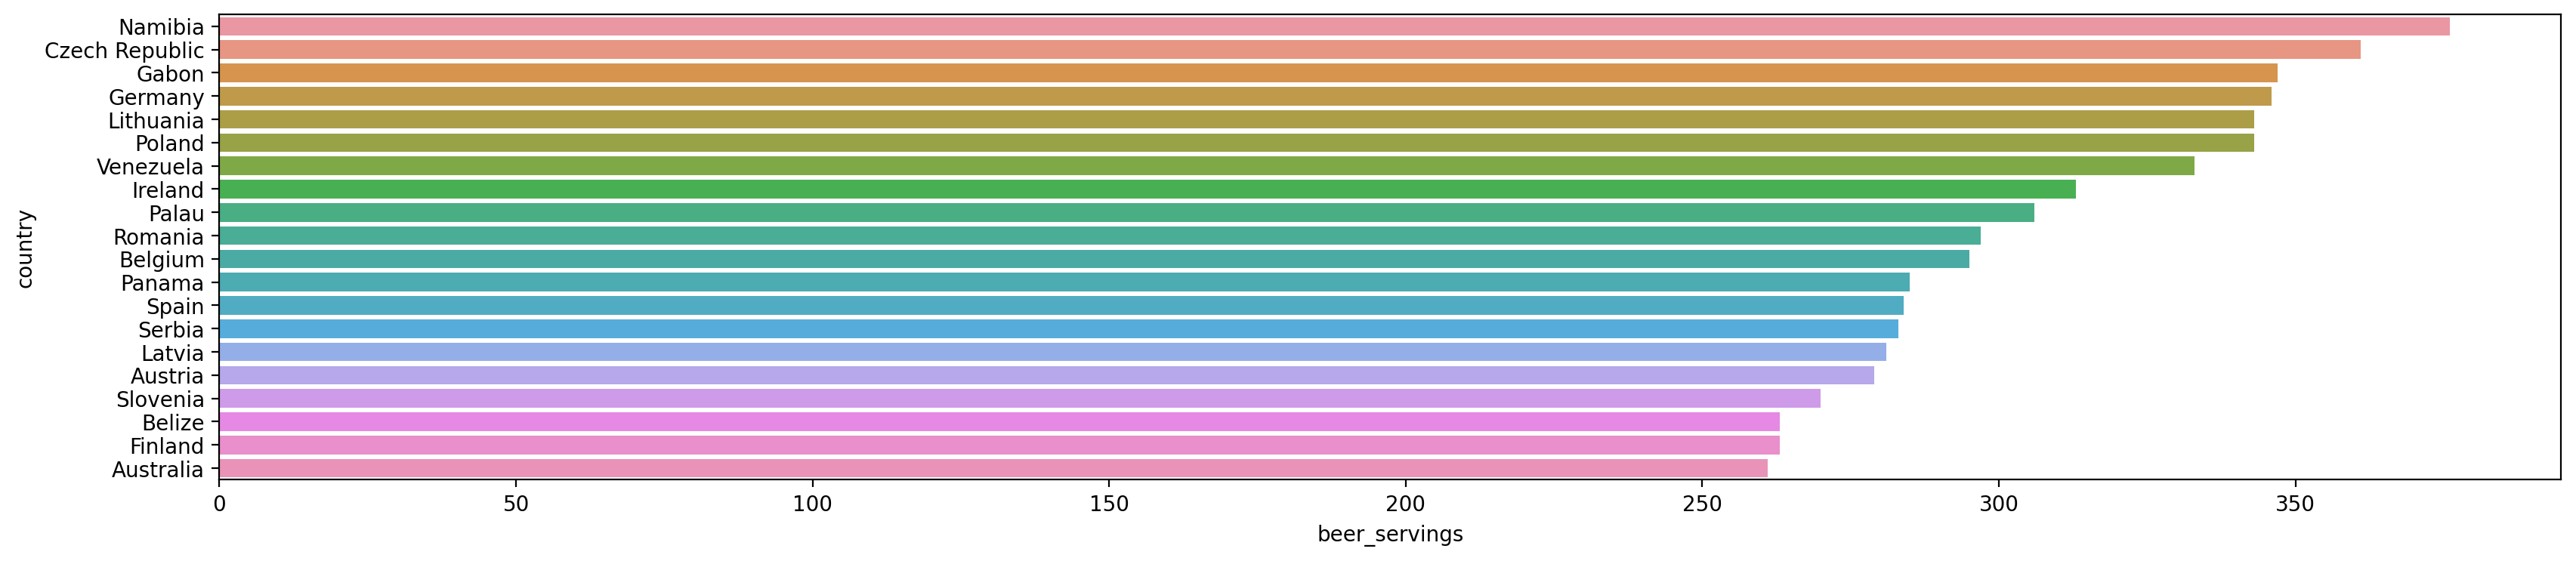

In [14]:
#Top 20 beer serving countries
beer = df.groupby("country")["beer_servings"].max().reset_index().sort_values(by='beer_servings',ascending=False)[:20]
plt.figure(figsize=(20,4),dpi=200)
sns.barplot(y='country',x="beer_servings",data=beer)
plt.yticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Grenada'),
  Text(0, 1, 'Belarus'),
  Text(0, 2, 'Haiti'),
  Text(0, 3, 'Russian Federation'),
  Text(0, 4, 'St. Lucia'),
  Text(0, 5, 'Guyana'),
  Text(0, 6, 'Slovakia'),
  Text(0, 7, 'Dominica'),
  Text(0, 8, 'Thailand'),
  Text(0, 9, 'Cook Islands'),
  Text(0, 10, 'Bulgaria'),
  Text(0, 11, 'Kazakhstan'),
  Text(0, 12, 'Lithuania'),
  Text(0, 13, 'Ukraine'),
  Text(0, 14, 'Moldova'),
  Text(0, 15, 'St. Vincent & the Grenadines'),
  Text(0, 16, 'Latvia'),
  Text(0, 17, 'Poland'),
  Text(0, 18, 'Hungary'),
  Text(0, 19, 'St. Kitts & Nevis')])

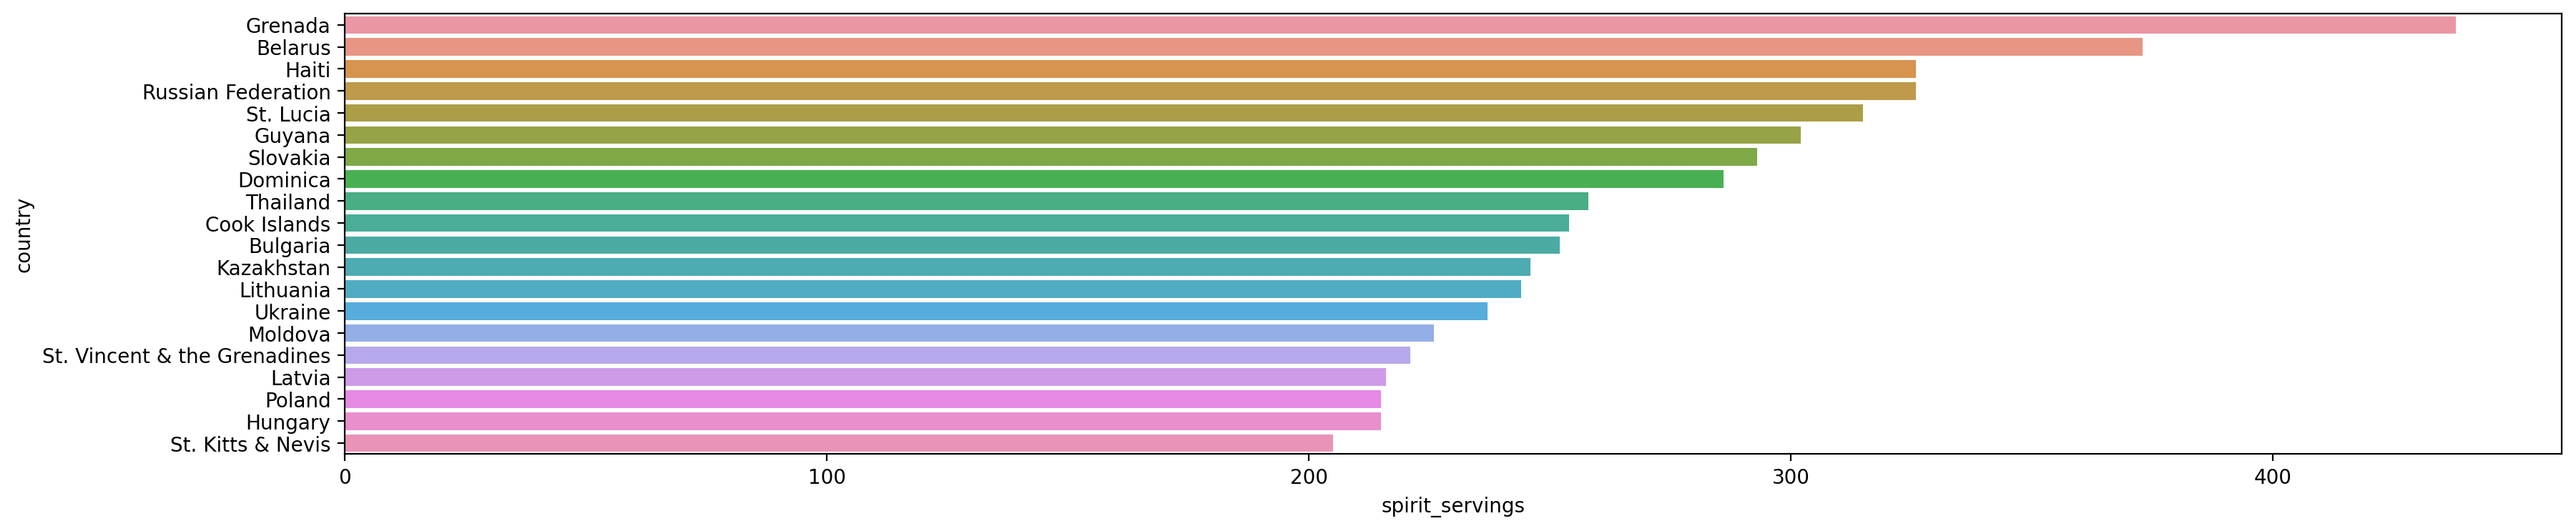

In [15]:
#Top 20 spirit servings countries
spirt = df.groupby("country")["spirit_servings"].max().reset_index().sort_values(by='spirit_servings',ascending=False)[:20]
plt.figure(figsize=(20,4),dpi=200)
sns.barplot(y='country',x="spirit_servings",data=spirt)
plt.yticks(rotation=0)

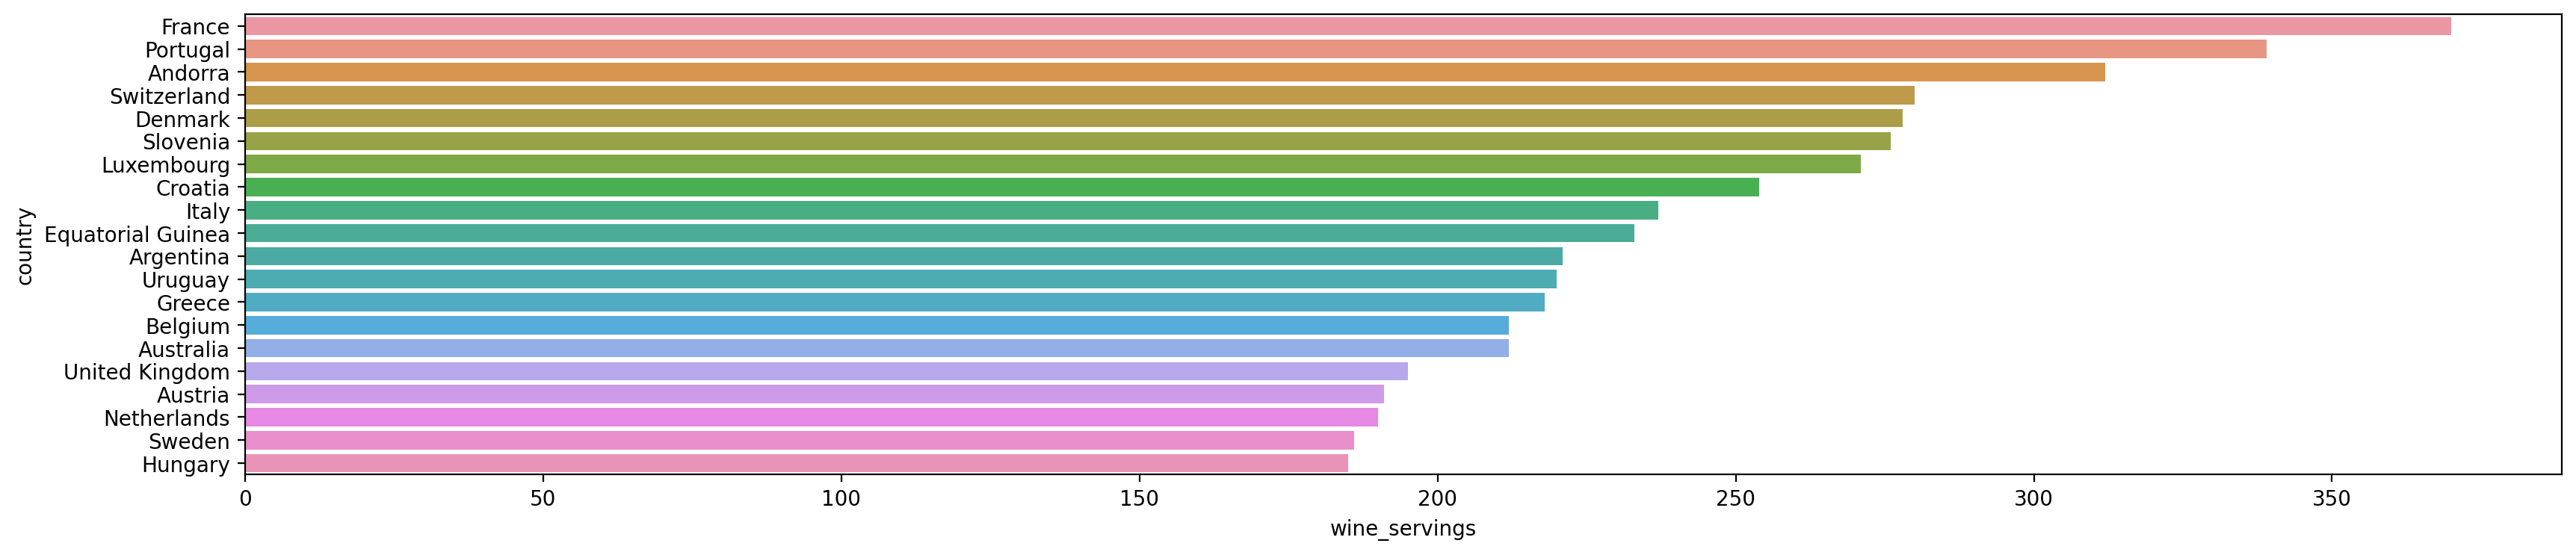

In [16]:
#Top 20 wine servings countries
wine = df.groupby("country")["wine_servings"].max().reset_index().sort_values(by='wine_servings',ascending=False)[:20]
plt.figure(figsize=(20,4),dpi=200)
sns.barplot(y='country',x="wine_servings",data=wine)
plt.yticks(rotation=0);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Belarus'),
  Text(0, 1, 'Lithuania'),
  Text(0, 2, 'Andorra'),
  Text(0, 3, 'Grenada'),
  Text(0, 4, 'France'),
  Text(0, 5, 'Czech Republic'),
  Text(0, 6, 'Russian Federation'),
  Text(0, 7, 'Slovakia'),
  Text(0, 8, 'Ireland'),
  Text(0, 9, 'Luxembourg'),
  Text(0, 10, 'Germany'),
  Text(0, 11, 'Hungary'),
  Text(0, 12, 'Portugal'),
  Text(0, 13, 'Poland'),
  Text(0, 14, 'Slovenia'),
  Text(0, 15, 'Belgium'),
  Text(0, 16, 'Latvia'),
  Text(0, 17, 'United Kingdom'),
  Text(0, 18, 'Romania'),
  Text(0, 19, 'Denmark')])

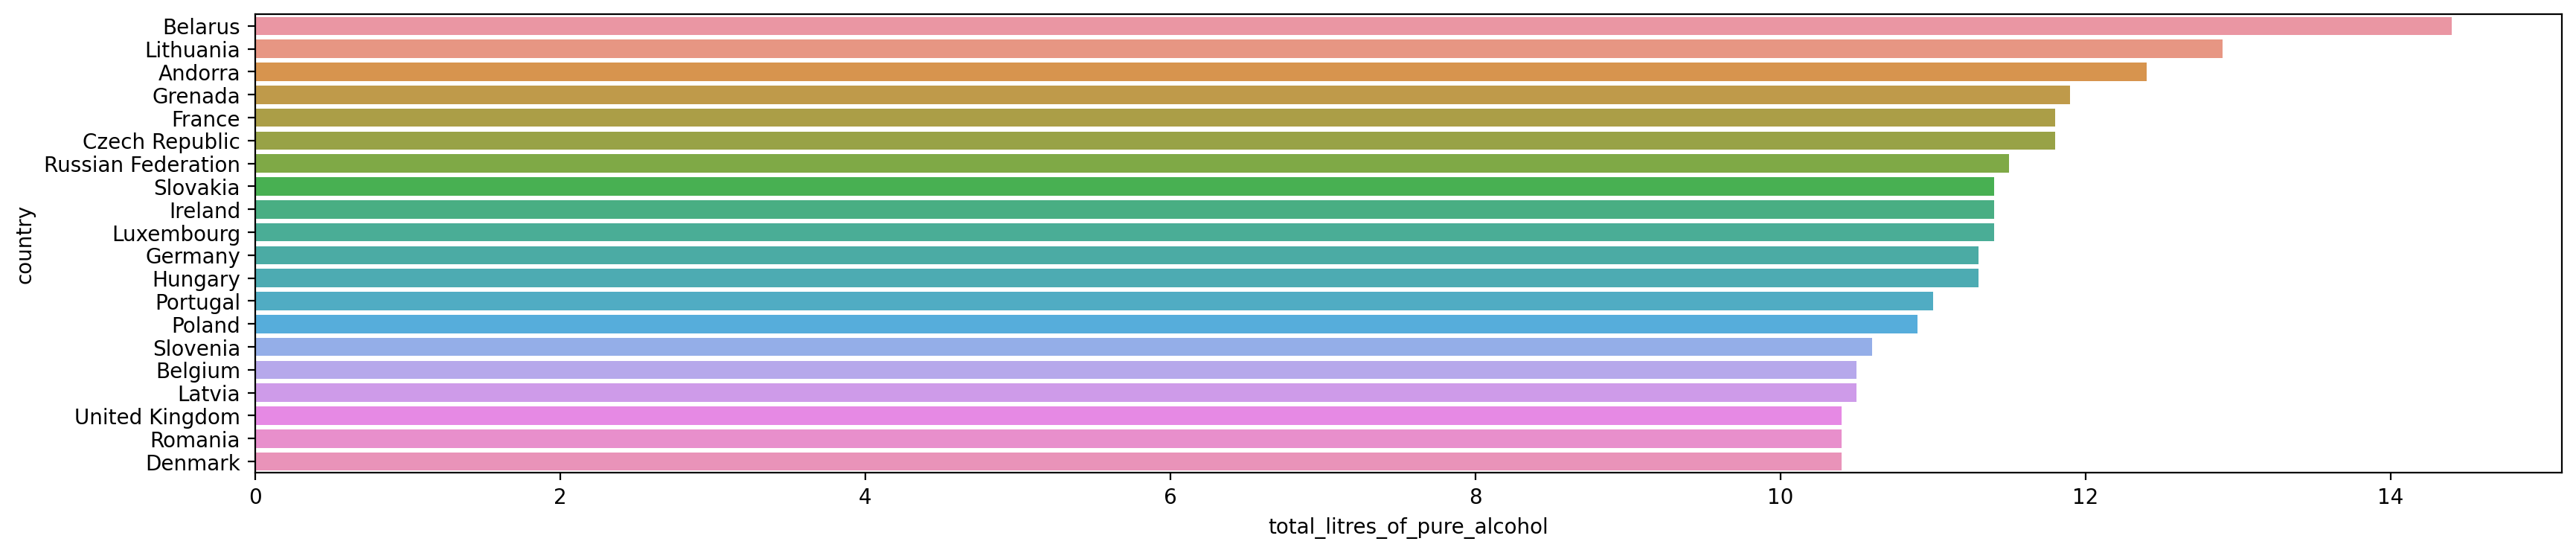

In [17]:
#Top 20 total_litres_of_pure_alcohol countries
alc = df.groupby("country")["total_litres_of_pure_alcohol"].max().reset_index().sort_values(by='total_litres_of_pure_alcohol',ascending=False)[:20]
plt.figure(figsize=(20,4),dpi=200)
sns.barplot(y='country',x="total_litres_of_pure_alcohol",data=alc)
plt.yticks(rotation=0)

> *** Is there any relationship?

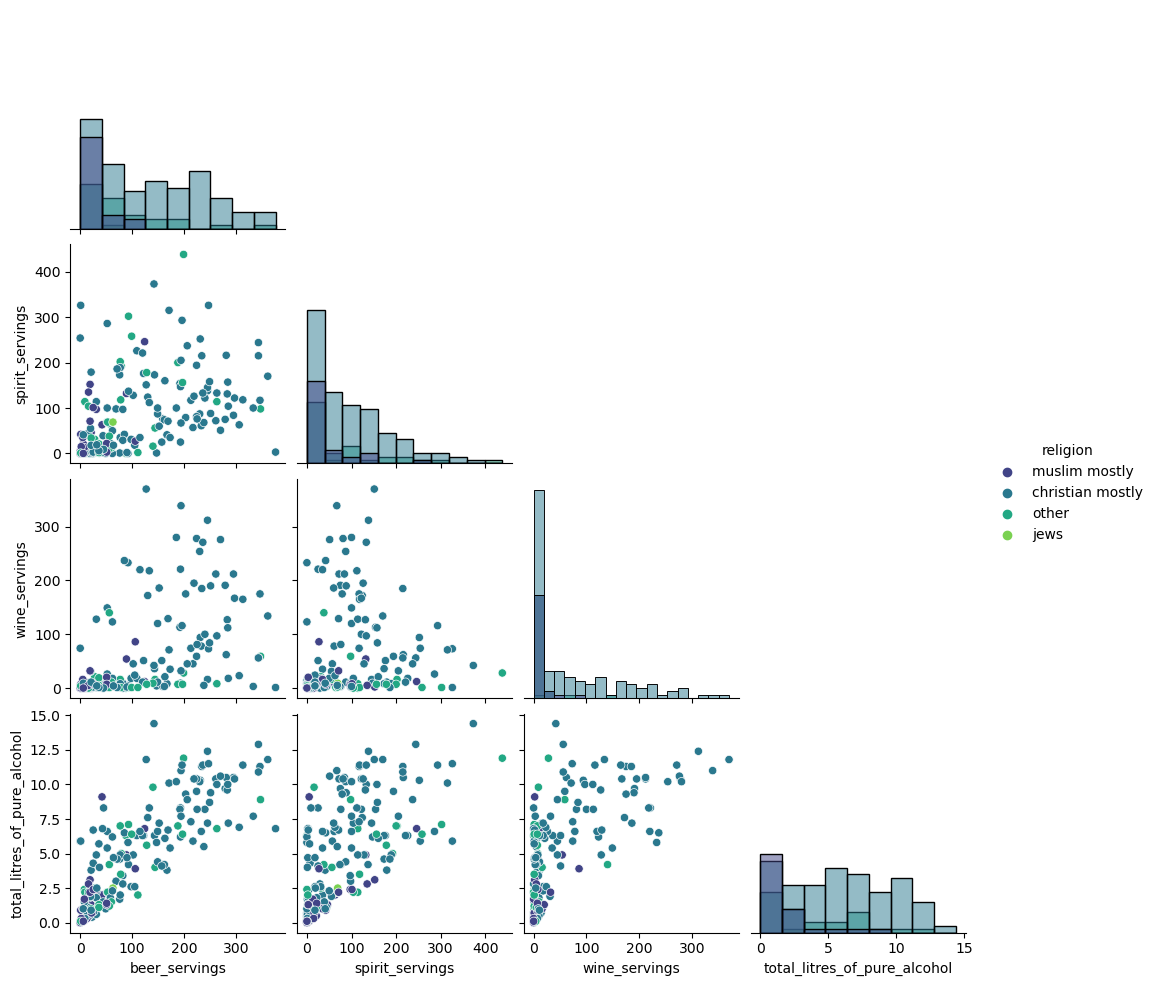

In [18]:
sns.pairplot(df,palette='viridis',
             diag_kind='hist',
             hue="religion",
             corner=True)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'beer_servings'),
  Text(0, 1.5, 'spirit_servings'),
  Text(0, 2.5, 'wine_servings'),
  Text(0, 3.5, 'total_litres_of_pure_alcohol')])

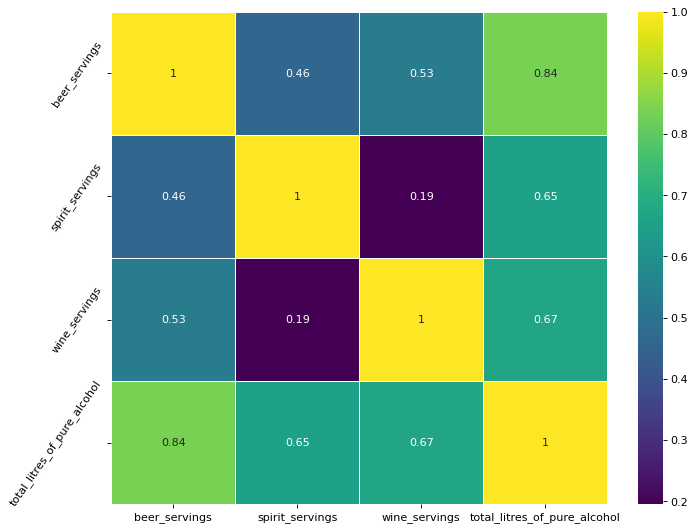

In [19]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

> **As we can see people who consuming of pure alcohol and beer is very correlated** > **We can see where the most beer and pure alcohol consumed was in Christian countries**.

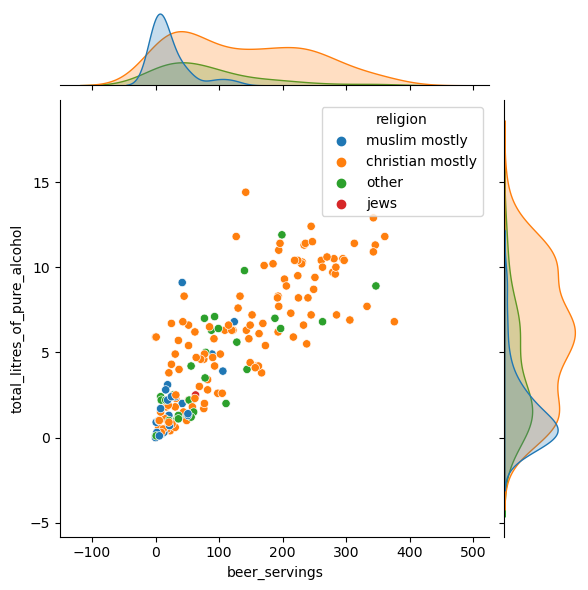

In [20]:
sns.jointplot(x='beer_servings',y='total_litres_of_pure_alcohol',data=df,hue="religion")

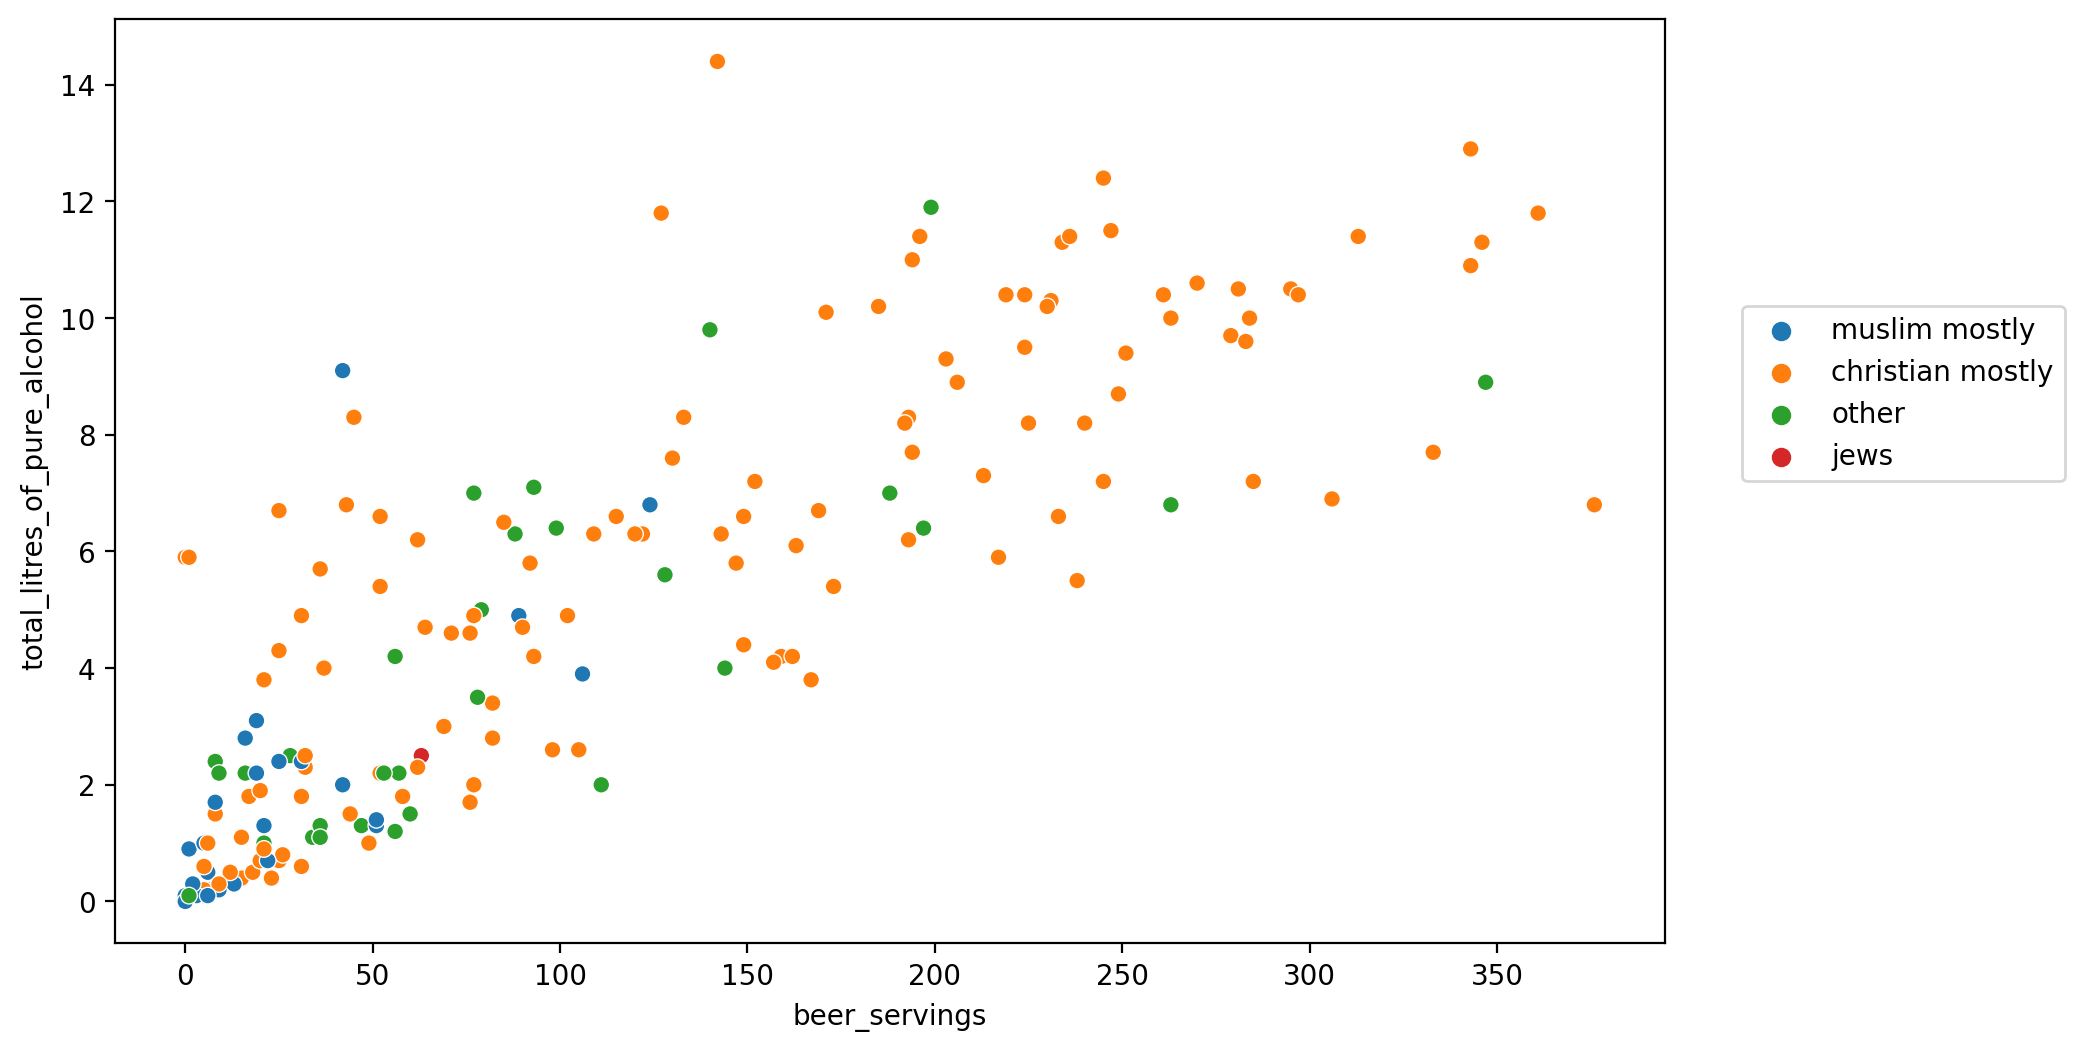

In [21]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='beer_servings',y='total_litres_of_pure_alcohol',hue="religion")
plt.legend(loc=(1.05,0.5))

**Let's add one more column which represent total consuming**

In [22]:
df["total_alcohol"] = df.beer_servings + df.wine_servings + df.spirit_servings + df.total_litres_of_pure_alcohol

> **So what's the relationship between total alcohol consumption and religious belief? > ** You can easily whhere countries with them most Christians also consume the most alcolhol ** >.

In [23]:
df.groupby("religion")[["beer_servings","wine_servings","spirit_servings","total_litres_of_pure_alcohol"]].sum()

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
religion,,,,
christian mostly,16940,8866,11444,733.5
jews,63,9,69,2.5
muslim mostly,722,273,1261,49.8
other,2764,396,2858,124.6


<AxesSubplot:xlabel='total_alcohol', ylabel='religion'>

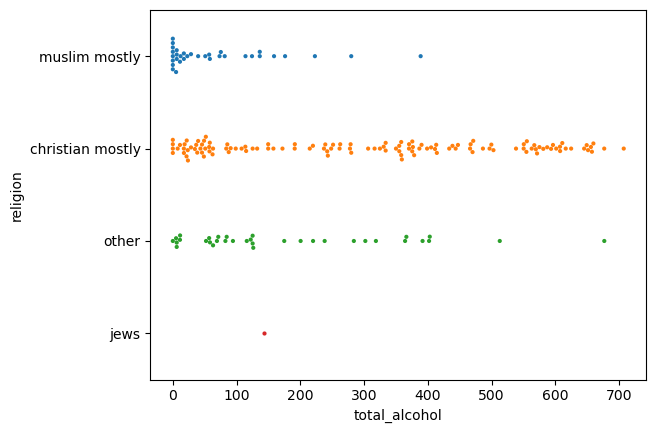

In [24]:
sns.swarmplot(x='total_alcohol',y='religion',data=df,size=3)

<AxesSubplot:xlabel='religion', ylabel='total_alcohol'>

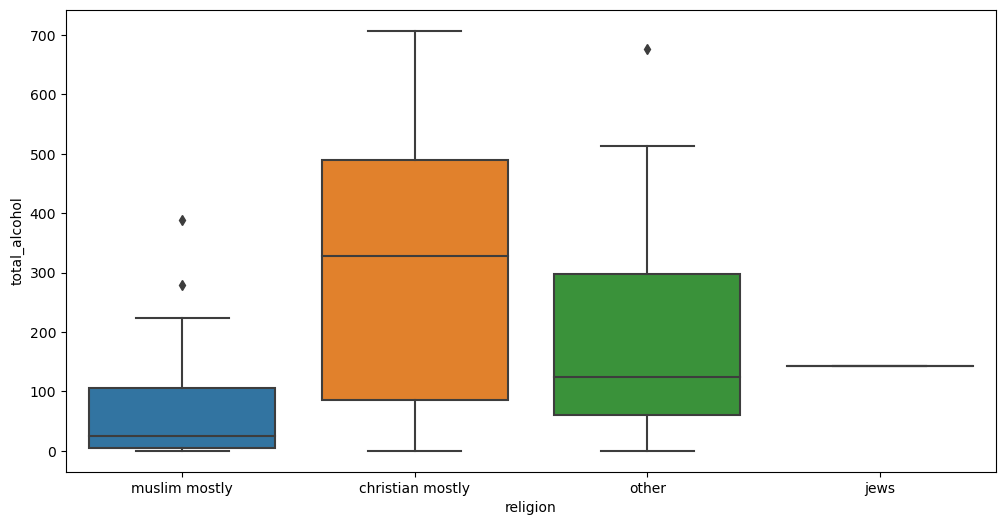

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='religion',y='total_alcohol',data=df)

**According to our research so far, different countries appear in the top 20 according to each type of drink. So how is this situation around the world?**
>  The most beer is consumed in the world. Beer is actually the most enjoyable beverage preferred by many people. As if a cold beer wouldn't be bad after a busy day 👌🍺

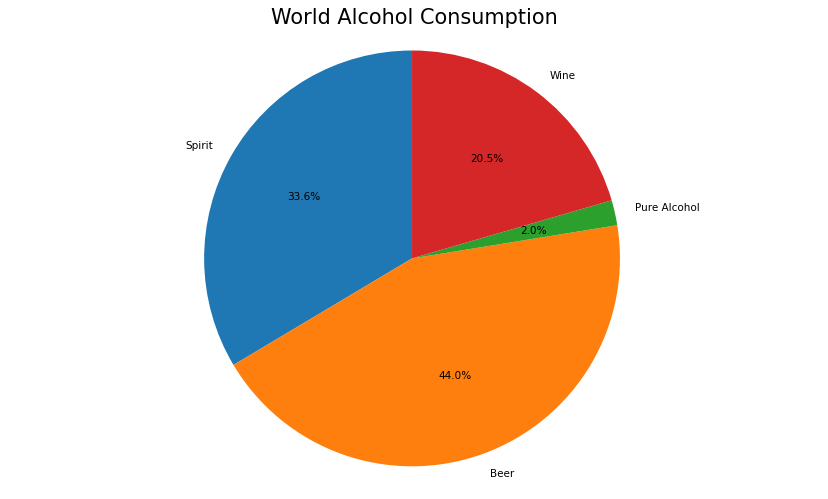

In [26]:
labels = 'Spirit','Beer', 'Pure Alcohol','Wine'
sections = [df.spirit_servings.sum(),
            df.beer_servings.sum(),
            df.total_litres_of_pure_alcohol.sum() ,
            df.wine_servings.sum()]
plt.figure(figsize=(14, 8), dpi=75)
plt.pie(sections, labels=labels,wedgeprops=dict( alpha=1),
        startangle=90,
        #explode = (0,0,0,0),
        autopct = '%0.1f%%',
         textprops={
                'fontsize': 10, 
                'fontweight': 'normal'}
            )

plt.axis('equal')
plt.title('World Alcohol Consumption',fontsize=20)
plt.show()

**Beer Lovers :**

> <img src= "https://www.icegif.com/wp-content/uploads/beer-icegif-1.gif" >

**Beer won again 🍻👌**
><img src='https://i.pinimg.com/originals/0c/48/86/0c488659132e5742a52a02ea4edfb11b.gif'>

In [ ]:
#df.groupby(["religion","country"])[["beer_servings","wine_servings","spirit_servings","total_litres_of_pure_alcohol"]].max()


### **Thank You For Reading!😊.**
I hope you enjoy👀